In [550]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import warnings
warnings.filterwarnings("ignore")

In [551]:
train_med = pd.read_csv('train_data.csv')
test_med = pd.read_csv('test_data.csv')

In [552]:
train_med.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900


**Data Information and description:**

In [553]:
train_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


In [554]:
train_med.describe()

,age,bmi,children,id,charges
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,666.874377,13267.935817
std,14.039105,6.013107,1.204619,386.570442,12051.356547
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,329.500000,4780.839400
50%,39.000000,30.200000,1.000000,675.000000,9447.382400
75%,51.000000,34.430000,2.000000,1001.500000,16840.667970
max,64.000000,53.130000,5.000000,1337.000000,62592.873090


**Checking Skewness in the dataset if any then treating the outliers:**

In [555]:
train_med.skew()

age         0.036805
bmi         0.289540
children    0.910284
id         -0.021560
charges     1.526521
dtype: float64

<AxesSubplot:xlabel='charges'>

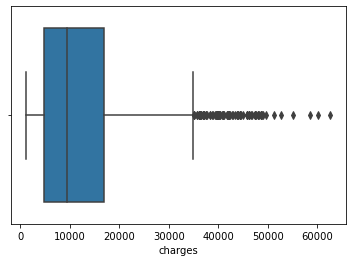

In [556]:
sns.boxplot(train_med['charges'])

In [557]:
def Outliers(abalone_train, var):
    Q1 = train_med['charges'].quantile(0.25)
    Q3 = train_med['charges'].quantile(0.75)
    IQR = Q3-Q1
    Lower = Q1-(1.5*IQR)
    Upper = Q3+(1.5*IQR)
    
    return Lower, Upper

In [558]:
lower_charge, upper_charge= Outliers(train_med, 'charges')

In [559]:
train_med['charges'] = np.where(train_med['charges'] > upper_charge, upper_charge, 
                                np.where(train_med['charges'] < lower_charge, lower_charge, train_med['charges']))

<AxesSubplot:xlabel='charges'>

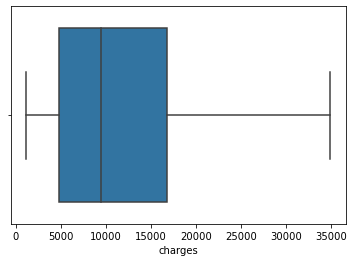

In [560]:
sns.boxplot(train_med['charges'])

# EDA:

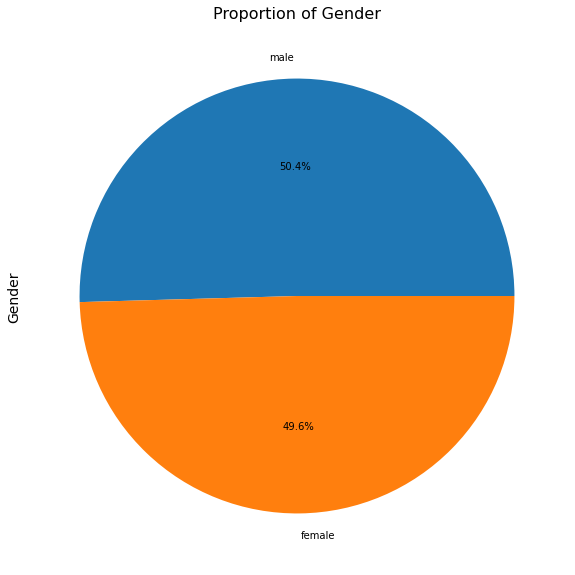

In [416]:
figure = plt.figure(figsize=[10, 10])
train_med['sex'].value_counts().plot.pie(autopct='%3.1f%%')

plt.ylabel(ylabel='Gender', size=14)
plt.title(label='Proportion of Gender', size=16)
plt.show()

<AxesSubplot:ylabel='Density'>

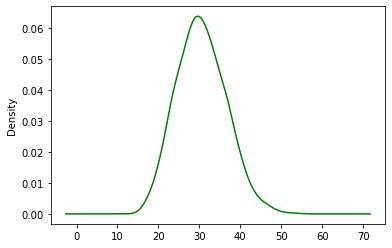

In [374]:
train_med['bmi'].plot.kde(color='green')

<AxesSubplot:ylabel='Density'>

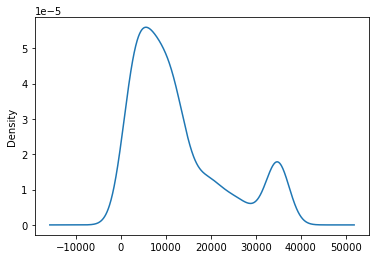

In [375]:
train_med['charges'].plot.kde()

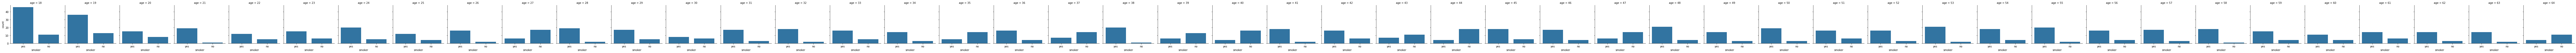

In [22]:
grid = sns.FacetGrid(train_med, col='age')
grid.map(sns.countplot, 'smoker')

Text(0.5, 1.0, 'Frequency Distribution')

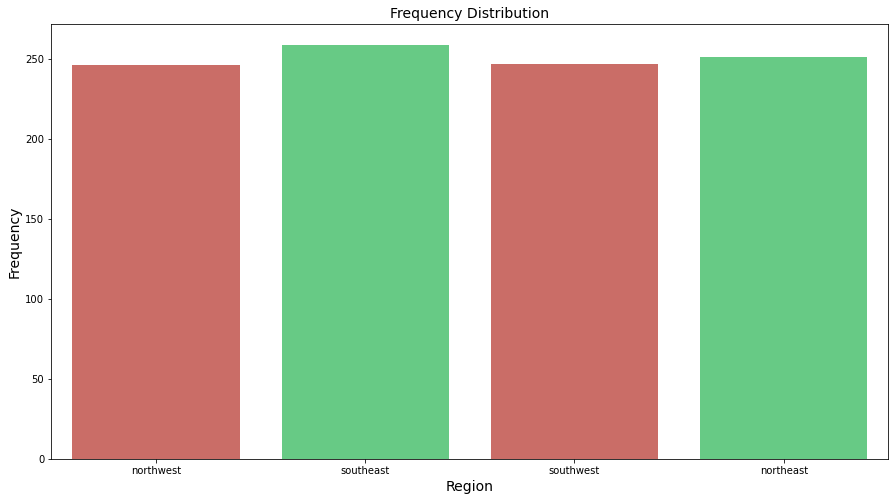

In [24]:
fig = plt.figure(figsize = [15, 8])

sns.countplot(x = 'region', data = train_med, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'Region', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

Text(0.5, 0, 'gender')

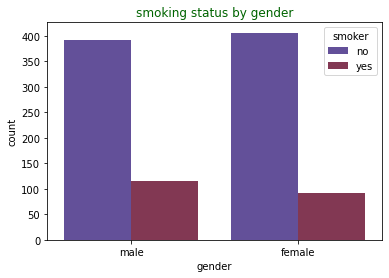

In [49]:
sns.countplot(x = 'sex', hue = 'smoker', data = train_med, palette="twilight")
plt.title("smoking status by gender", color = "darkgreen")
plt.xlabel("gender")

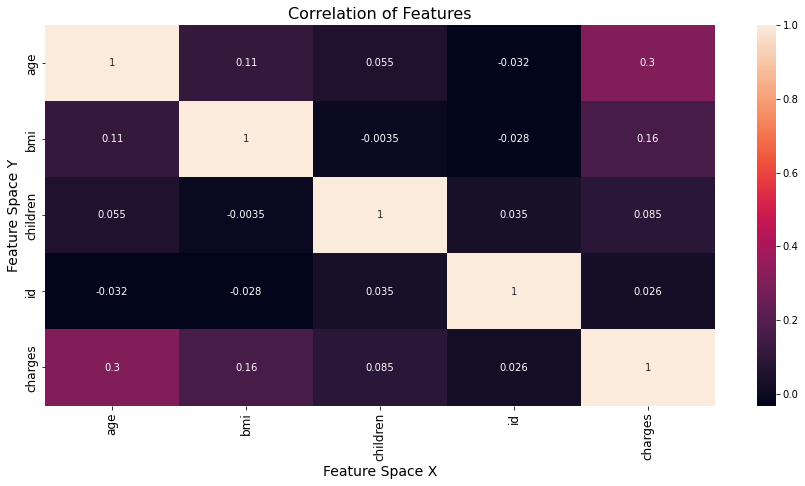

In [52]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_med.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

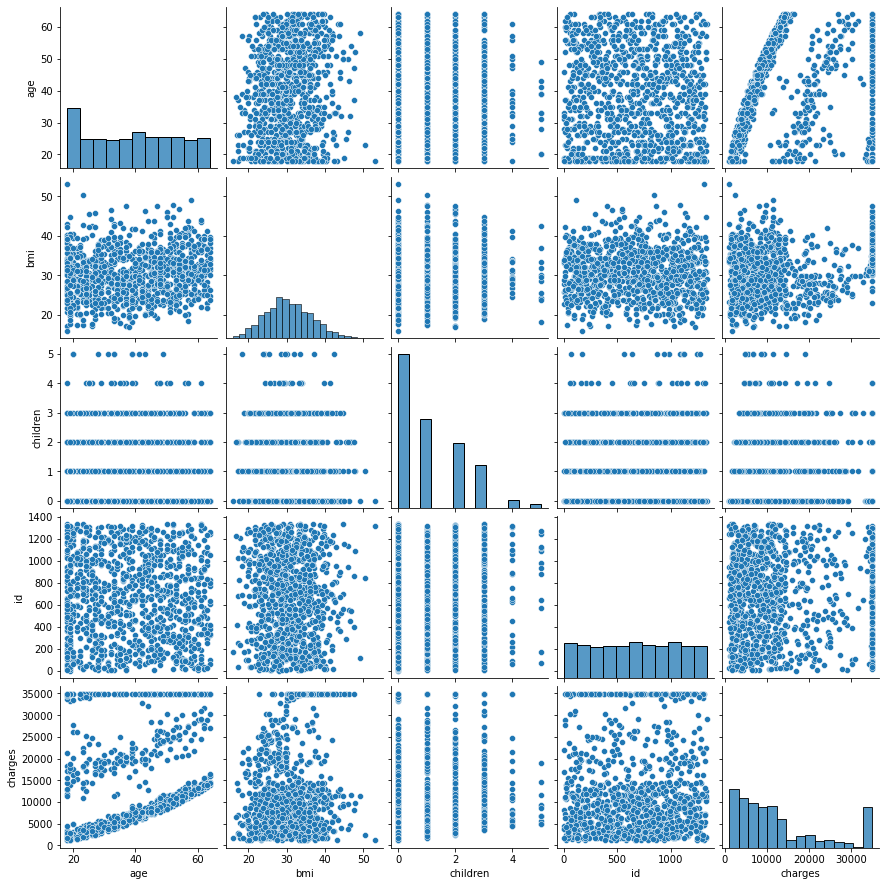

In [53]:
sns.pairplot(train_med)

Text(0.5, 0, 'Region')

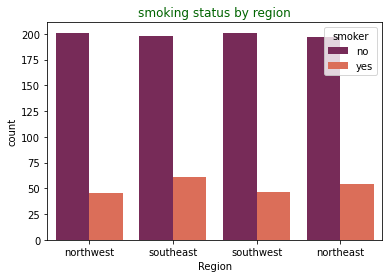

In [55]:
sns.countplot(x = 'region', hue = 'smoker', data = train_med, palette="rocket")
plt.title("smoking status by region", color = "darkgreen")
plt.xlabel("Region")

<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

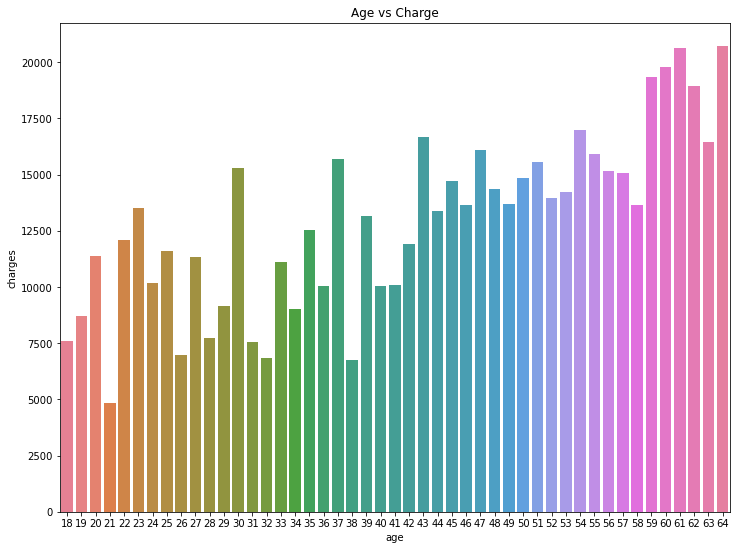

In [59]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data= train_med,palette='husl', ci = None)

**Using LabelEncoder for Categorical variables:**

In [561]:
from sklearn.preprocessing import LabelEncoder

In [562]:
le = LabelEncoder()

In [563]:
train_med['sex'] = le.fit_transform(train_med['sex'])
train_med['smoker'] = le.fit_transform(train_med['smoker'])
train_med['region'] = le.fit_transform(train_med['region'])

In [564]:
train_med.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
id            int64
charges     float64
dtype: object

# Tain-Test Split:

In [565]:
x = train_med.iloc[:, 0:6]
y = train_med['charges']

In [566]:
from sklearn.model_selection import train_test_split

In [567]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 45)

In [568]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(802, 6)
(201, 6)
(802,)
(201,)


In [569]:
from sklearn.preprocessing import StandardScaler

In [570]:
sc = StandardScaler()

In [571]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

**Decision Tree Regressor**

In [573]:
from sklearn.tree import DecisionTreeRegressor
treeRegressionModel = DecisionTreeRegressor(random_state=0)
treeRegressionModel.fit(x_train_sc, y_train)

#Predicting on test data
y_pred_test = treeRegressionModel.predict(x_test_sc)

In [574]:
y_pred_test 

array([ 7325.0482  , 34930.410825, 34930.410825,  9869.8102  ,
        1627.28245 ,  9863.4718  ,  2897.3235  , 12982.8747  ,
        8765.249   , 34930.410825, 10214.636   ,  9964.06    ,
       13012.20865 ,  1621.8827  , 10156.7832  ,  6600.20595 ,
       18806.14547 ,  6406.4107  ,  3875.7341  ,  2201.0971  ,
       10704.47    ,  7228.21565 , 21232.18226 ,  1711.0268  ,
        2304.0022  ,  9724.53    , 11356.6609  ,  7222.78625 ,
        5148.5526  , 34930.410825,  7727.2532  , 19144.57652 ,
       11073.176   , 34930.410825, 13844.506   , 19361.9988  ,
       10702.6424  , 10577.087   , 20462.99766 , 34472.841   ,
        9504.3103  ,  9504.3103  , 17904.52705 ,  8124.4084  ,
        7727.2532  ,  6548.19505 ,  8211.1002  , 10156.7832  ,
        6933.24225 ,  2166.732   , 34930.410825,  8891.1395  ,
        4922.9159  , 10436.096   ,  1815.8759  ,  4894.7533  ,
       13112.6048  ,  9290.1395  ,  1135.9407  , 17179.522   ,
        6571.544   , 34930.410825,  2899.48935 ,  2217.

In [575]:
treeRegressionModel.score(x_test_sc, y_test)

0.7543632607644696

In [576]:
treeRegressionModel = DecisionTreeRegressor(random_state=42, max_depth=6)
treeRegressionModel.fit(x_train_sc, y_train)
treeRegressionModel.score(x_test_sc, y_test)
score_depth = treeRegressionModel.score(x_test_sc, y_test)

In [577]:
print(score)

0.8267349052163194


Text(0, 0.5, 'Predicted Values')

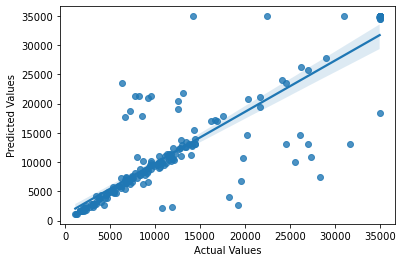

In [578]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [579]:
from sklearn.metrics import mean_squared_error, r2_score

In [580]:
MSE = mean_squared_error(y_test, y_pred_test)
print('MSE for test set is {}'.format(MSE))

MSE for test set is 25316264.96759636


In [581]:
RMSE = np.sqrt(MSE)
print('RMSE for test set is {}'.format(RMSE))

RMSE for test set is 5031.527100950204


In [582]:
R2= r2_score(y_test, y_pred_test)
print("R2 score for test set is {}".format(R2))

R2 score for test set is 0.7543632607644696


**Loading Test dataset:**

In [583]:
test_med.head()

,age,sex,bmi,children,smoker,region,id
0,45,female,25.175,2,no,northeast,764
1,36,female,30.020,0,no,northwest,887
2,64,female,26.885,0,yes,northwest,890
3,46,male,25.745,3,no,northwest,1293
4,19,male,31.920,0,yes,northwest,259


In [584]:
test_med.describe()

,age,bmi,children,id
count,335.000000,335.000000,335.000000,335.000000
mean,39.062687,31.117343,1.065672,673.367164
std,14.102457,6.333625,1.209438,386.392527
min,18.000000,16.815000,0.000000,10.000000
25%,26.000000,26.505000,0.000000,348.000000
50%,39.000000,30.800000,1.000000,650.000000
75%,51.000000,35.272500,2.000000,1019.500000
max,64.000000,52.580000,5.000000,1334.000000


In [585]:
test_med.skew()

age         0.112216
bmi         0.251900
children    1.027757
id          0.065137
dtype: float64

In [586]:
test_med.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
id            int64
dtype: object

In [587]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [588]:
test_med['sex'] = le.fit_transform(test_med['sex'])
test_med['smoker'] = le.fit_transform(test_med['smoker'])
test_med['region'] = le.fit_transform(test_med['region'])

In [589]:
test_med.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
id            int64
dtype: object

In [590]:
test_df = test_med.iloc[:, 0:6 ]

In [591]:
predicted_test =treeRegressionModel.predict(test_df)

In [592]:
predicted_test

array([34930.410825  , 17138.22817025, 34930.410825  , 34930.410825  ,
       34930.410825  , 17138.22817025, 17138.22817025, 17138.22817025,
       17138.22817025, 34930.410825  , 34930.410825  , 34930.410825  ,
       17138.22817025, 34930.410825  , 34930.410825  , 34930.410825  ,
       34930.410825  , 34930.410825  , 17138.22817025, 34930.410825  ,
       34930.410825  , 34930.410825  , 17138.22817025, 17138.22817025,
       34930.410825  , 17138.22817025, 17138.22817025, 34930.410825  ,
       34930.410825  , 17138.22817025, 34930.410825  , 17138.22817025,
       17138.22817025, 34930.410825  , 17138.22817025, 17138.22817025,
       17138.22817025, 17138.22817025, 34930.410825  , 34930.410825  ,
       34930.410825  , 17138.22817025, 17138.22817025, 17138.22817025,
       34930.410825  , 17138.22817025, 34930.410825  , 34930.410825  ,
       34930.410825  , 34930.410825  , 17138.22817025, 17138.22817025,
       17138.22817025, 17138.22817025, 17138.22817025, 34930.410825  ,
      

In [593]:
test_df['charges_pred'] = predicted_test

In [594]:
test_df.to_csv('Submission_preds.csv', index = False, header = False)